In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.append('../../code/')
import leakage

In [19]:
exometabolites_folder = Path("../../data/e_coli/")
organism = 'e_coli'
fn_OD = exometabolites_folder / "{0}_OD.csv".format(organism)

In [35]:
concentrations, concentrations_std = leakage.get_concentrations(exometabolites_folder, 'e_coli')

In [24]:
df_OD = pd.read_csv(fn_OD, index_col=0)
df_OD.fillna(df_OD['OD std'].mean())

,OD mean,OD std
Time,,
0,0.500,0.116168
1,0.514,0.116168
2,0.608,0.116168
3,0.817,0.116168
4,1.595,0.049497
5,2.295,0.190919
6,5.085,0.035355
7,8.765,0.106066
8,13.300,0.056569


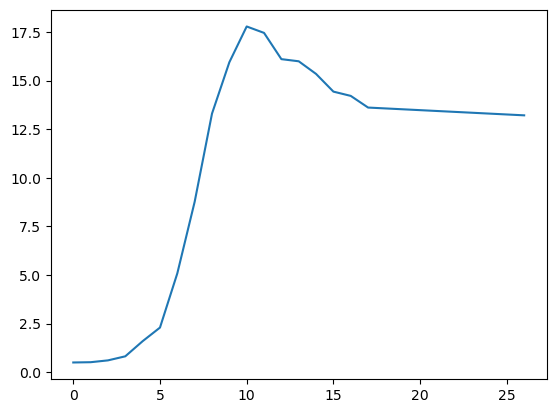

In [29]:
plt.plot(df_OD.index, df_OD['OD mean'])

In [41]:
x = np.cumsum(df_OD['OD mean'])

In [38]:
concentrations.fillna(0, inplace=True)

In [40]:
concentrations['G6P']

Time
0      0.000000
1      0.101467
2      0.277733
3      0.362400
4      0.704000
5      1.450667
6      2.996000
7      6.520000
8     10.720000
9     13.453333
10    15.866667
11    17.653333
12    17.120000
13    12.760000
14    14.120000
15    14.373333
16    14.533333
17    11.106667
26     8.626667
Name: G6P, dtype: float64

G6P


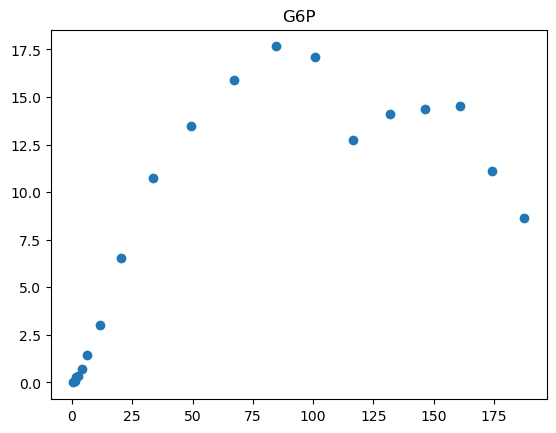

F6P


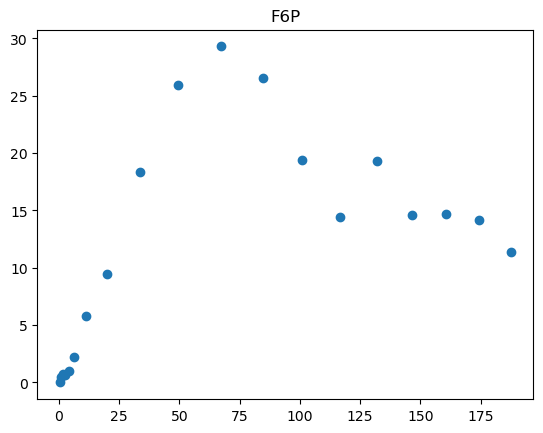

FBP


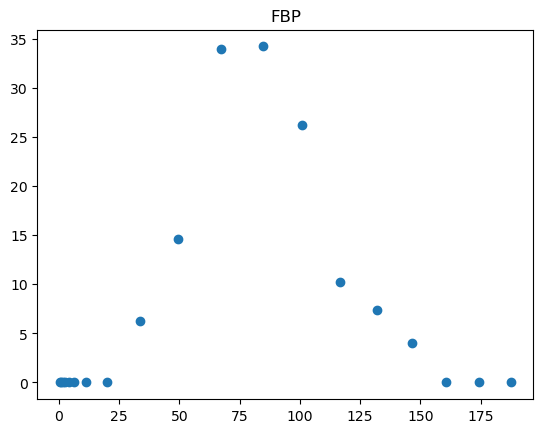

DHAP


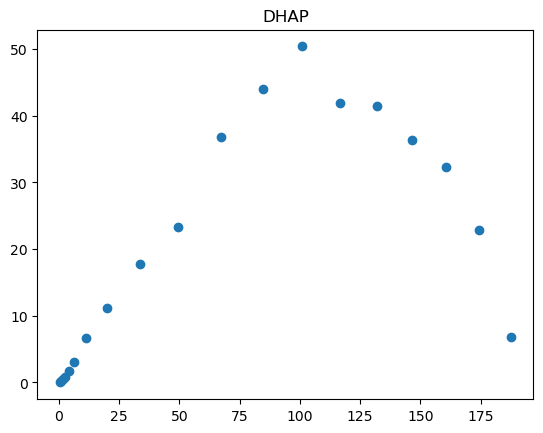

GA3P


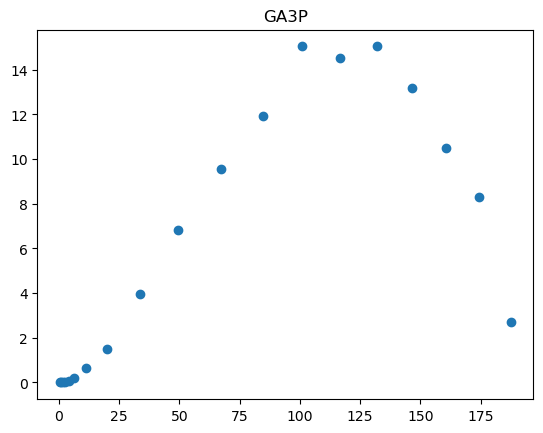

23PG


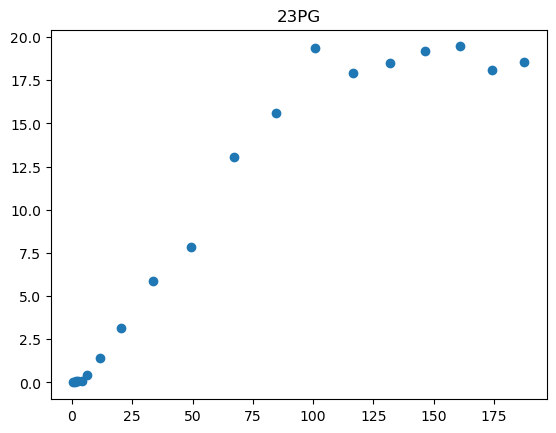

PEP


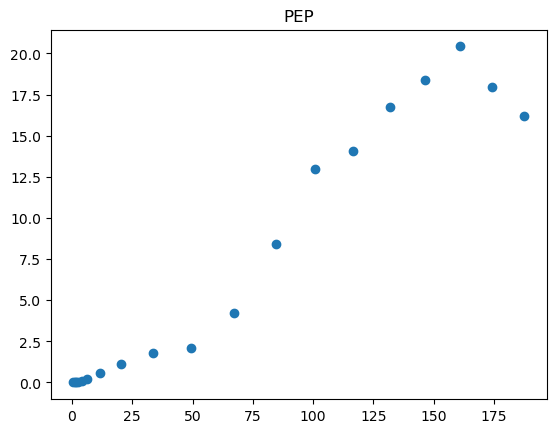

R5P


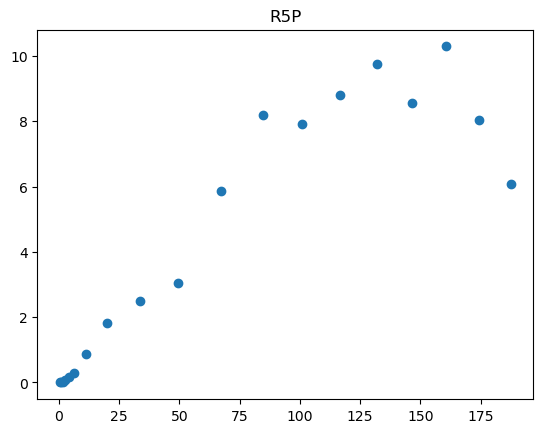

RU5P+X5P


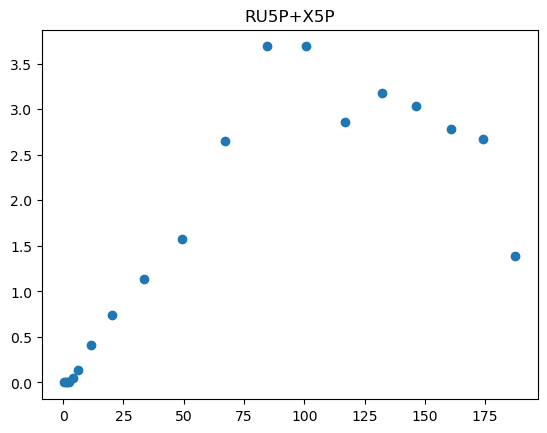

E4P


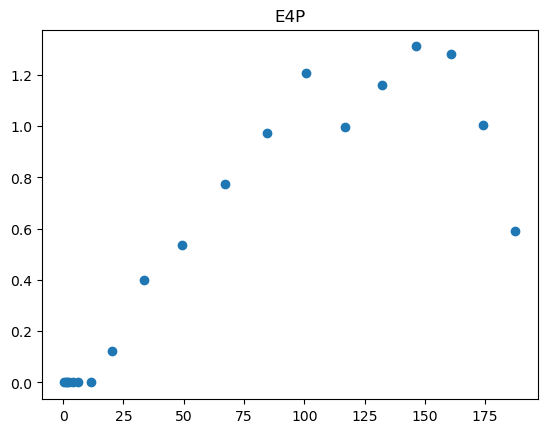

CIT


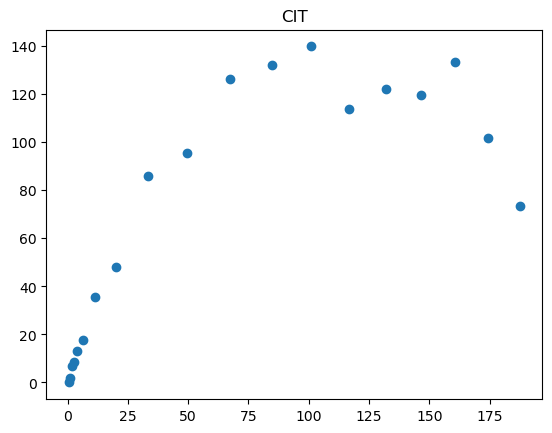

ACN


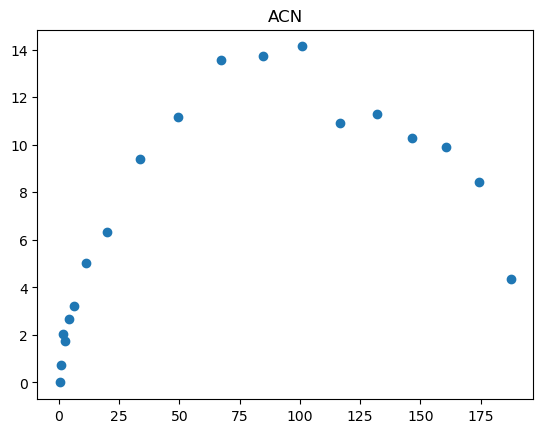

ICIT


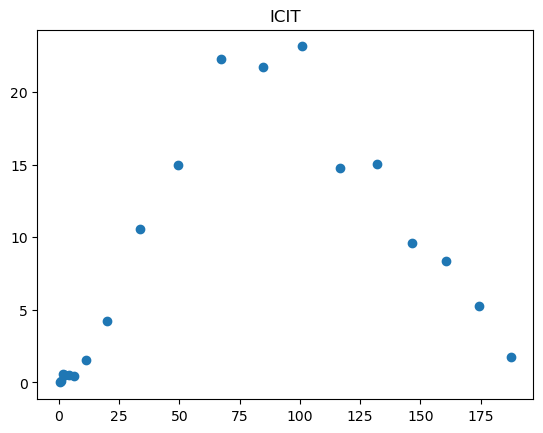

AKG
           AKG    AKG
Time                 
0     0.000000    0.0
1     0.000000    0.0
2     0.000000    0.0
3     0.000000    0.0
4     0.000000    0.0
5     0.000000    0.0
6     0.000000    0.0
7     0.000000    0.0
8     0.000000    5.5
9     0.000000   12.5
10    0.211600   50.0
11    2.270667  101.0
12    0.000000  131.0
13    0.000000  186.5
14    0.817333  189.0
15    1.932000  180.0
16    1.992000  200.0
17    2.032000  164.5
26    1.112000  158.5
FUM
            FUM    FUM
Time                  
0      0.000000   0.00
1      2.432000  13.50
2      4.440000   1.25
3      1.701333   1.25
4      6.080000   0.00
5      4.800000   1.00
6      6.053333   2.00
7      9.493333   2.50
8      5.946667   5.00
9      5.746667   3.00
10     8.426667   3.00
11     5.666667   3.50
12     6.133333   2.00
13     5.373333   0.00
14     5.280000   0.00
15    10.400000   0.00
16    12.453333   0.00
17     9.720000   0.00
26    10.013333   0.00
OAS


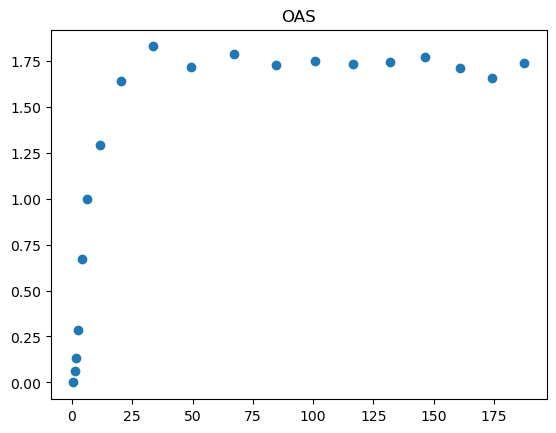

GLU


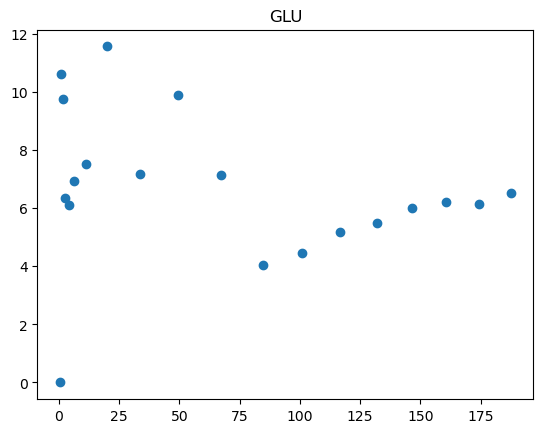

SER


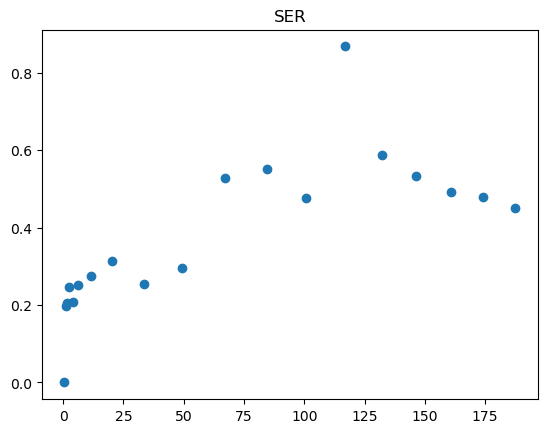

ASP


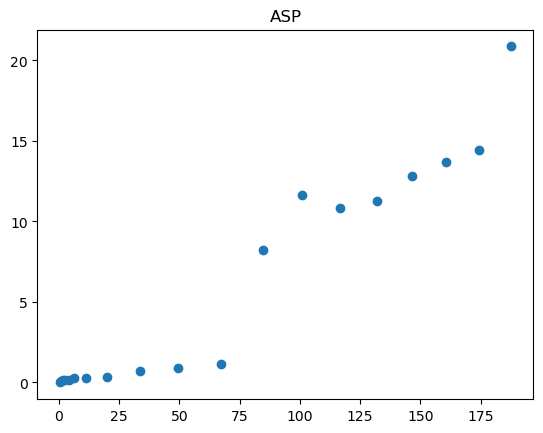

THR


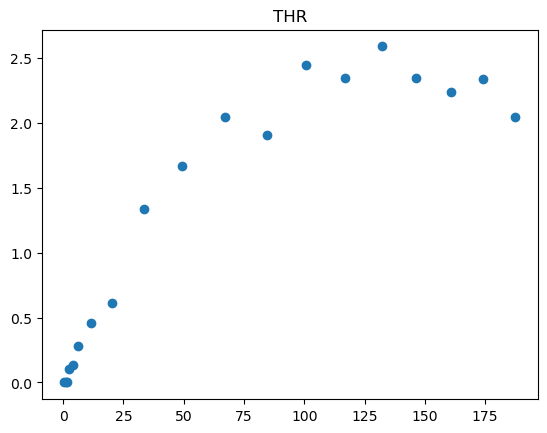

HOM


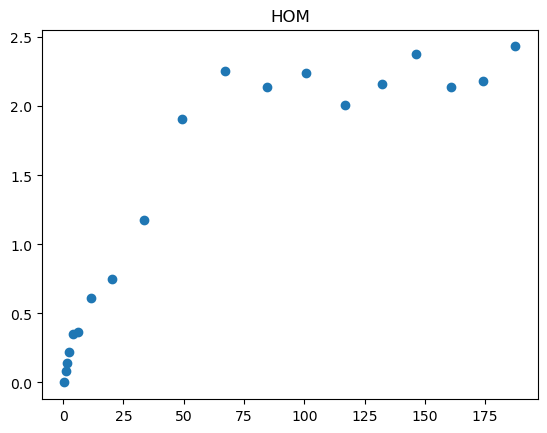

TYR


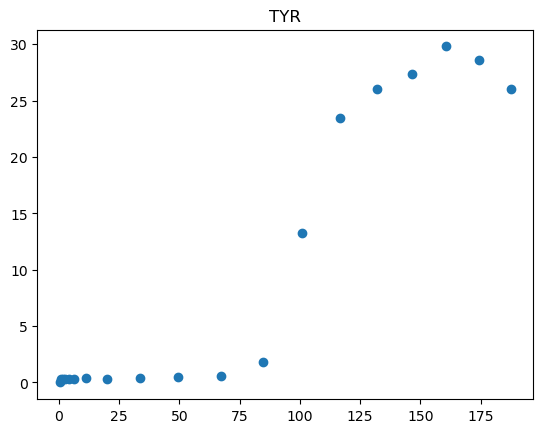

GLY


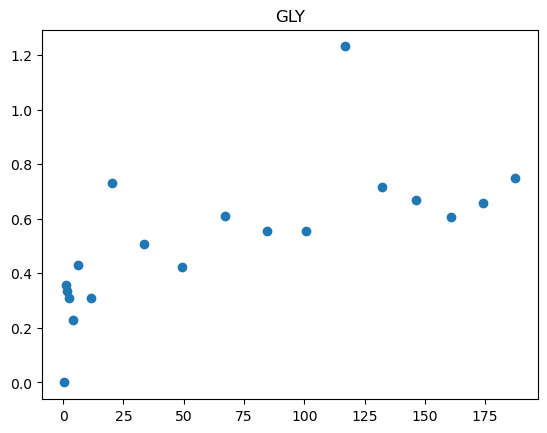

PRO


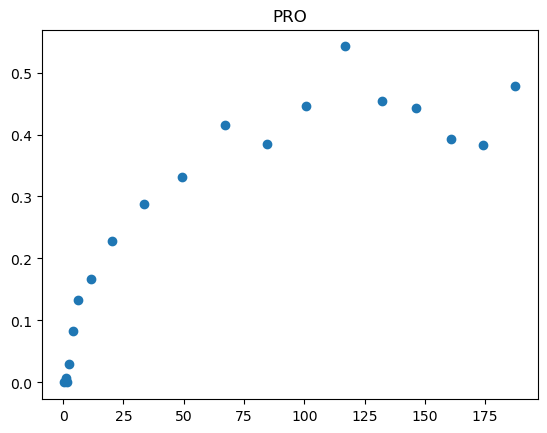

ALA


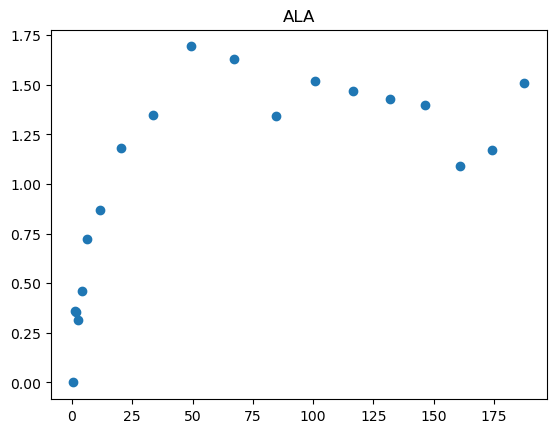

MET


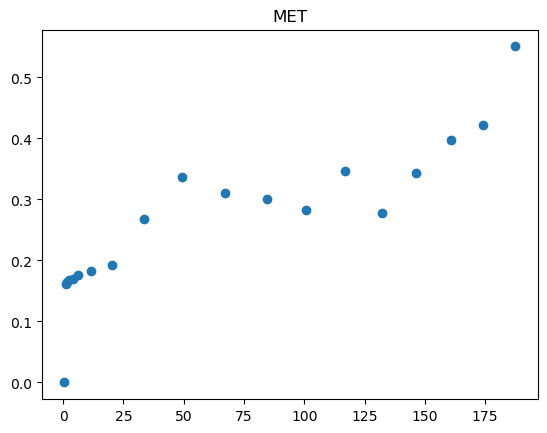

VAL


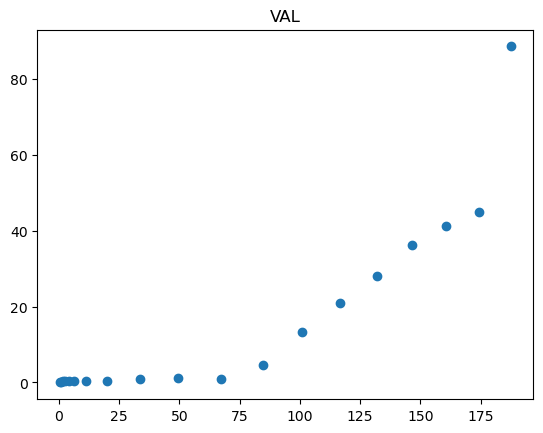

PHE


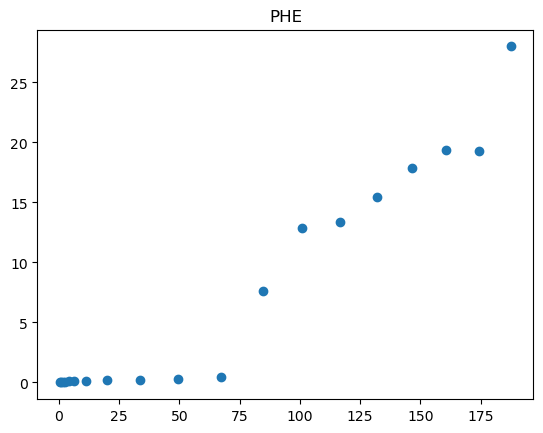

ILEU


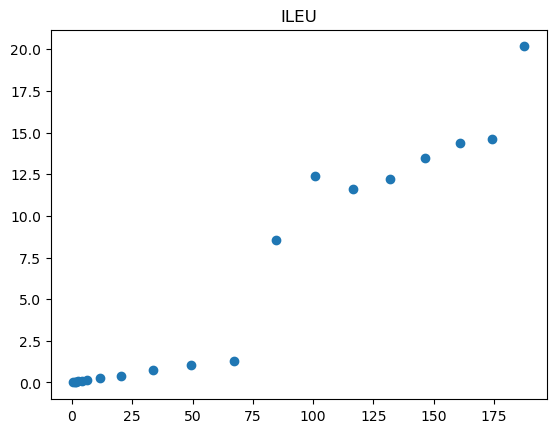

LEU


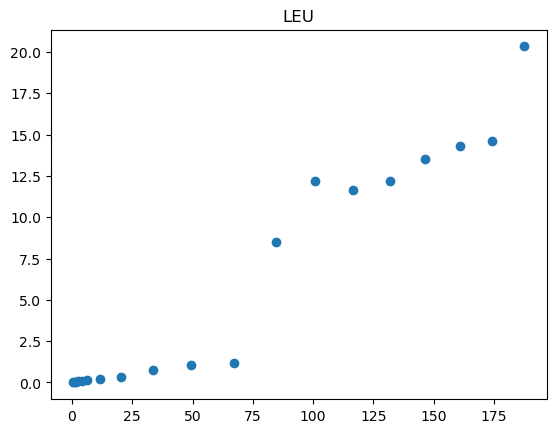

TRP


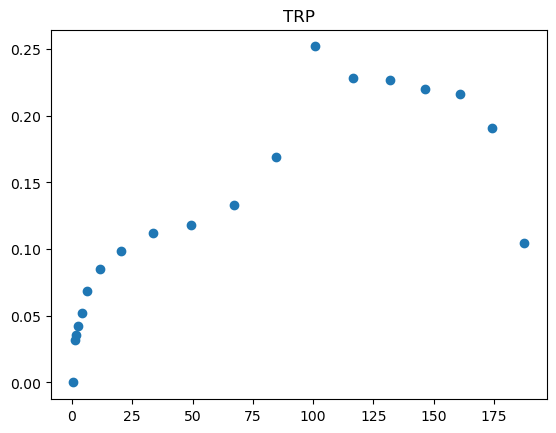

HIS


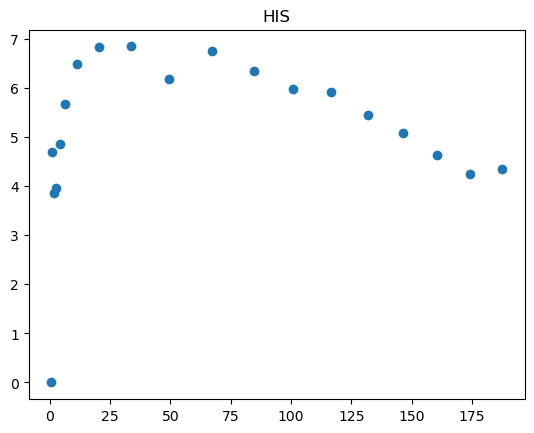

ARG


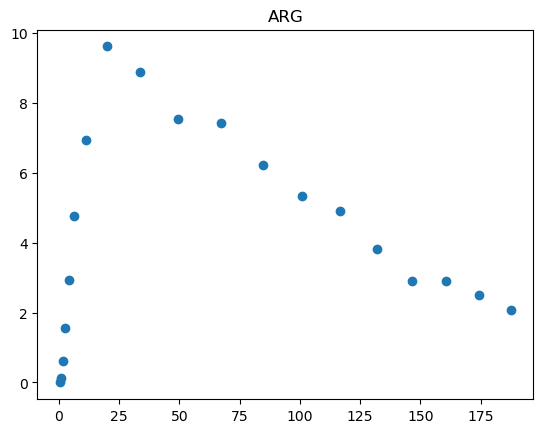

PYR


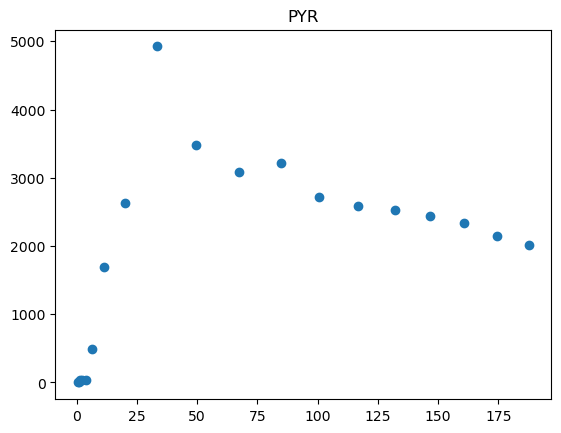

ORO


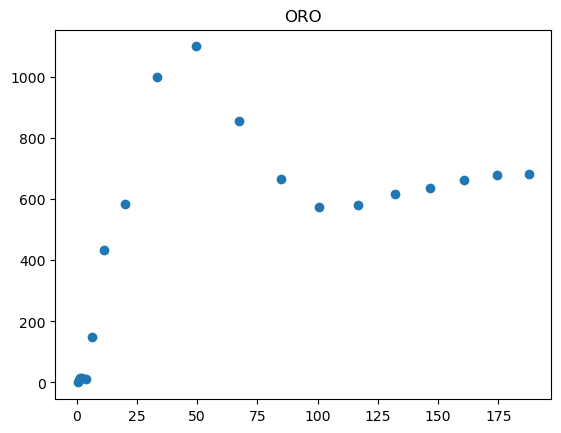

FUM
            FUM    FUM
Time                  
0      0.000000   0.00
1      2.432000  13.50
2      4.440000   1.25
3      1.701333   1.25
4      6.080000   0.00
5      4.800000   1.00
6      6.053333   2.00
7      9.493333   2.50
8      5.946667   5.00
9      5.746667   3.00
10     8.426667   3.00
11     5.666667   3.50
12     6.133333   2.00
13     5.373333   0.00
14     5.280000   0.00
15    10.400000   0.00
16    12.453333   0.00
17     9.720000   0.00
26    10.013333   0.00
URA


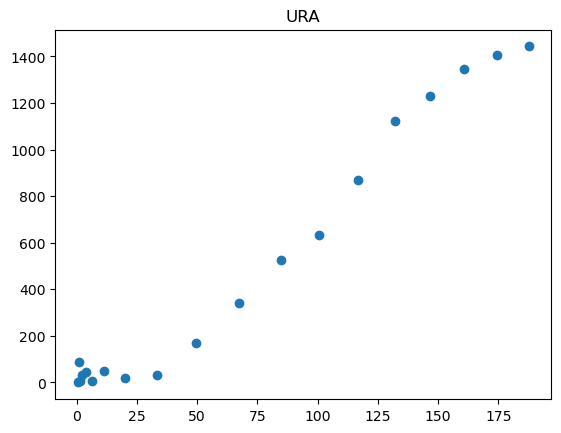

AKG
           AKG    AKG
Time                 
0     0.000000    0.0
1     0.000000    0.0
2     0.000000    0.0
3     0.000000    0.0
4     0.000000    0.0
5     0.000000    0.0
6     0.000000    0.0
7     0.000000    0.0
8     0.000000    5.5
9     0.000000   12.5
10    0.211600   50.0
11    2.270667  101.0
12    0.000000  131.0
13    0.000000  186.5
14    0.817333  189.0
15    1.932000  180.0
16    1.992000  200.0
17    2.032000  164.5
26    1.112000  158.5
ACT


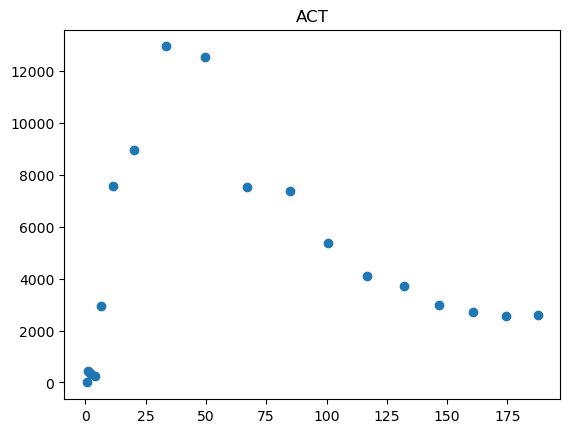

In [63]:
for key in concentrations.columns:
    print(key)
    try:
        plt.scatter(x, concentrations[key])
    except ValueError:
        print(concentrations[key])
    else:
        plt.title(key)
        plt.show()

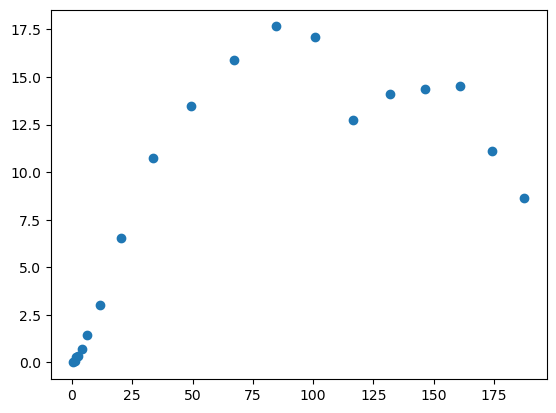

In [55]:
plt.scatter(x, concentrations['G6P'])
n = 10
i = 3
j = 8
fit = np.polyfit(x[i:j], concentrations['G6P'][i:j], 1)